In [78]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read csv
df = pd.read_csv('list_uu_ma.csv')
df.head()

,yymmdd,bukken_num,ma_uu
0,2019/9/2,1869348,102779
1,2019/9/3,1866327,104150
2,2019/9/4,1863043,102966
3,2019/9/5,1856749,101334
4,2019/9/6,1862467,99162


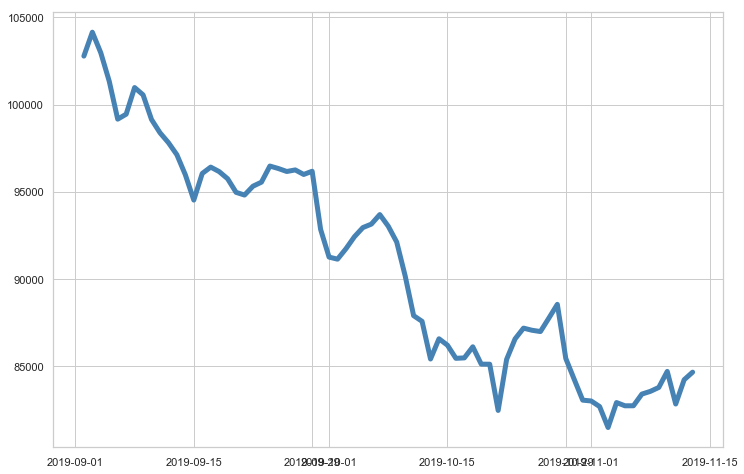

In [79]:
df['yymmdd'] = pd.to_datetime(df['yymmdd'])
df = df.set_index('yymmdd')

# トラフィック数を可視化
plt.rcParams['figure.figsize'] = 12, 8
plt.plot(df.index, df["ma_uu"], linewidth=5, color="steelblue")

In [80]:
df = df[["ma_uu"]]
df.head()

,ma_uu
yymmdd,
2019-09-02,102779
2019-09-03,104150
2019-09-04,102966
2019-09-05,101334
2019-09-06,99162


In [81]:
df["cap"] = df["ma_uu"].max()

In [82]:
from fbprophet import Prophet

df_input = df.reset_index().rename(columns={'yymmdd':'ds', 'ma_uu':'y'})
model = Prophet(growth='logistic', daily_seasonality=False)
# model.add_seasonality(name='weekly', period=7, fourier_order=5)
model.fit(df_input)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [83]:
future = model.make_future_dataframe(periods=30)
future["cap"] = df["ma_uu"].max()
forecast = model.predict(future)

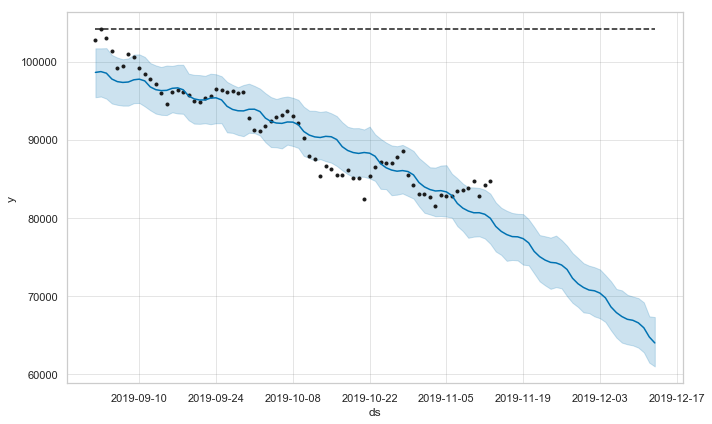

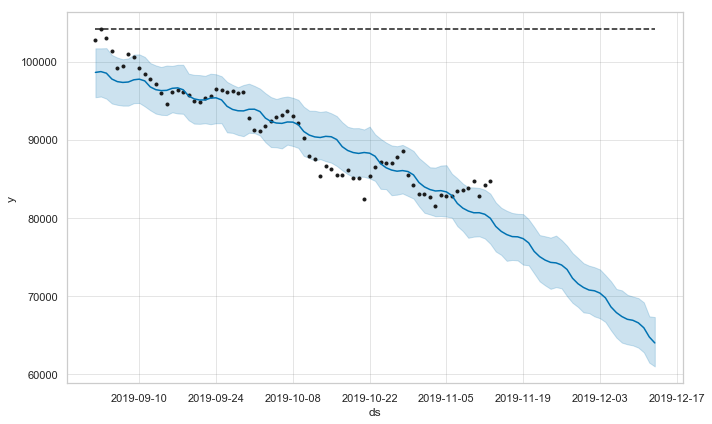

In [86]:
model.plot(forecast)

In [87]:
import seaborn as sns
import numpy as np

# add change rates to changepoints
df_changepoints = df_input.loc[model.changepoints.index]
df_changepoints['delta'] = model.params['delta'].ravel()
df_changepoints["abs"] = np.abs(df_changepoints['delta'])

In [88]:
cp = df_changepoints.sort_values("abs", ascending=False)
cp.head(10)

,ds,y,cap,delta,abs
52,2019-10-24,87174,104150,0.000473,0.000473
25,2019-09-27,96249,104150,0.000371,0.000371
36,2019-10-08,93021,104150,0.000291,0.000291
39,2019-10-11,87891,104150,0.000215,0.000215
48,2019-10-20,85104,104150,0.000189,0.000189
43,2019-10-15,86196,104150,0.000146,0.000146
41,2019-10-13,85403,104150,0.000108,0.000108
46,2019-10-18,86103,104150,0.000087,0.000087
34,2019-10-06,93140,104150,0.000077,0.000077
55,2019-10-27,87751,104150,0.000053,0.000053


In [89]:
df_changepoints

,ds,y,cap,delta,abs
2,2019-09-04,102966,104150,2.478208e-10,2.478208e-10
5,2019-09-07,99446,104150,2.815537e-10,2.815537e-10
7,2019-09-09,100555,104150,3.481822e-10,3.481822e-10
9,2019-09-11,98381,104150,-8.886862e-11,8.886862e-11
11,2019-09-13,97119,104150,-3.126211e-10,3.126211e-10
14,2019-09-16,96047,104150,1.724261e-10,1.724261e-10
16,2019-09-18,96153,104150,1.295668e-11,1.295668e-11
18,2019-09-20,94963,104150,3.951151e-10,3.951151e-10
21,2019-09-23,95547,104150,-6.473546e-11,6.473546e-11
23,2019-09-25,96330,104150,-1.234462e-11,1.234462e-11


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



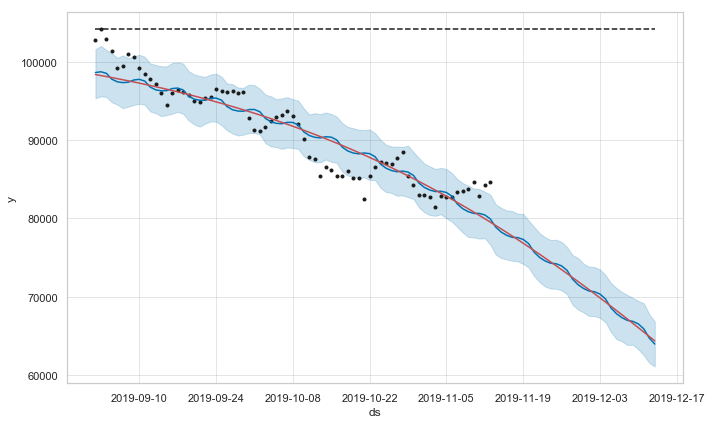

In [90]:
from fbprophet.plot import add_changepoints_to_plot
model = Prophet(growth='logistic', daily_seasonality=False)
# model.add_seasonality(name='weekly', period=7, fourier_order=5)
model.fit(df_input)

future = model.make_future_dataframe(periods=30)
future["cap"] = df["ma_uu"].max()
forecast = model.predict(future)

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



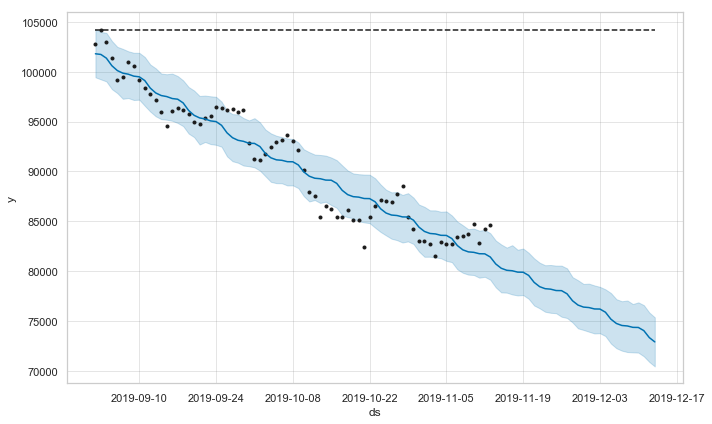

In [96]:
# Python
m = Prophet(changepoints=['2019-09-30'])
forecast = m.fit(df_input).predict(future)
fig = m.plot(forecast)

,yymmdd,ma_uu,cap
0,2019-09-02,102779,104150
1,2019-09-03,104150,104150
2,2019-09-04,102966,104150
3,2019-09-05,101334,104150
4,2019-09-06,99162,104150
5,2019-09-07,99446,104150
6,2019-09-08,100974,104150
7,2019-09-09,100555,104150
8,2019-09-10,99140,104150
9,2019-09-11,98381,104150
